Проект: Изучение закономерностей рынка компьютерных игр для дальнейшего планирования рекламных кампаний, кампаний по продвижению продуктов и продаж. Имеются данные из общедоступных источников о выходе (дата релиза, название игры и жанр) игр на игровых платформах и продажи по регионам мира в млн. копий, данные пользовательских оценок, оценок критиков и рейтинги специальзированной организации. Целью является определение наиболее востребованных жанров (платформ), определение зависимостей между определенными параметрами, определение динамики продаж.

# 1. Загрузка датасета и получение информации о нем

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import os

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','critic_score', 'user_score', 'rating']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Загруженный датасет состоит из 16715 записей. Имеются пропуски данных в столбцах name, year_of_release, genre, critic_score, user_score, rating. Пропусков в столбцах name, genre одинаковое количество (отсутствие имени в названии продукта повлекло отсутствие жанра). Столбец year имеет формат float64. Планируется удаление отсутствующих строк в name, year_of_release, genre так как их невозможно заменить подходящими значениями и они составляют менее 1 % от общего объема данных. Остальные значения в столбце year_of_release будут приведены к формату int.  Столбец user_score содержит текстовые значения tbd (to be determinated - требует уточнения), данные в нем представлены в текстовом формате. Планируется замена значений tbd значениями nan и перевод данных в столбце в формат float. Планируется заполнить пропуски в столбцах critic_score, user_score средними значениями из группы со сохожим именем (name) и медианными значениями платформ. Отстутствующие значения в столбце rating планируется заменить no rating.

# 2. Подготовка данных

In [4]:
games = games.dropna(subset = ['name'])

удаляем строк в которых отсутсутствует имя игры

In [5]:
games['user_score'].replace('tbd', np.nan, inplace=True)

заменяем значения tbd значениями nan

In [6]:
games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

In [7]:
games['user_score'] = games['user_score'].astype('float')

In [8]:
games['user_score'] = games['user_score'].fillna(games.groupby('name')['user_score'].transform('mean'))

In [10]:
games['critic_score'] = games['critic_score'].fillna(games.groupby('name')['critic_score'].transform('mean'))

In [12]:
games['rating'] = games['rating'].fillna(value='no rating')

заполняем отсутствующие значения столбцов user_score и critic_score средними и медианными значениями. отсутствующие значения в столбце rating заполняем записями  no rating.

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('max'))

заполняем пропущенные значения в столбце year_of_release зачениями установленные у игр с тем же именем.

In [14]:
games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.008736
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.455633
user_score         0.480105
rating             0.000000
dtype: float64

In [16]:
games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.008736
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.455633
user_score         0.480105
rating             0.000000
dtype: float64

In [17]:
games = games.dropna(subset = ['year_of_release'])

In [18]:
games.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.454639
user_score         0.478542
rating             0.000000
dtype: float64

удаляем строки которые не удалось заполнить значениями

In [20]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = '%Y').dt.year

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [22]:
games.reset_index(drop = True, inplace = True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16563,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating
16564,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16565,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating


In [23]:
games ['total_sales'] = games ['na_sales']+games ['eu_sales']+games ['jp_sales']+games ['other_sales']

заполнены пропуски в данных у которых была возможность их заполнения и удалены строки у которых отсутствовала возможность заполнения пропусков. Из исходного датасета удалены 179 строк, что составляет 1% от исходных данных. Данные о продажах на разных рынках собраны в одном столбце.

# 3. Проведение исследовательского анализа данных

<AxesSubplot:xlabel='year_of_release'>

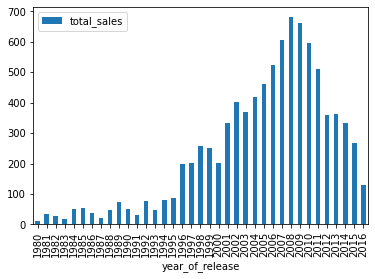

In [24]:
games_grop_by_release_year =games.groupby('year_of_release')['total_sales'].sum().reset_index()
games_grop_by_release_year.plot(kind = 'bar', x='year_of_release', y='total_sales')

Выпуск игр по годам неравномерный. Можно выделить 4 временных интервала в выходе игр на рынок 1980-1990 (стабильно малый), 1991-2001 (стабильный рост) 2002-2011 ("игровой бум") 2012-2016 (спад).

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

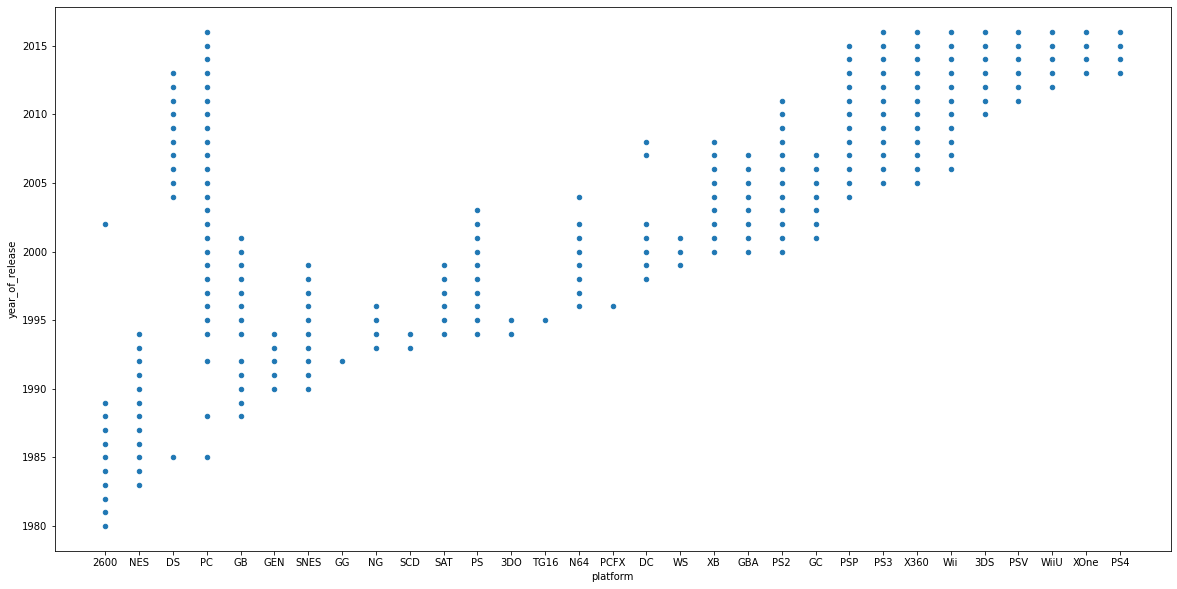

In [25]:
games_grop_by_platform = games.groupby(by=['platform','year_of_release'])['total_sales'].sum().reset_index()
games_grop_by_platform.sort_values(by='year_of_release', ascending=True, inplace=True)
games_grop_by_platform.plot(kind = 'scatter', x= 'platform', y = 'year_of_release', figsize = (20, 10))

In [26]:
games_grop_by_platform

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
80,NES,1983,10.96
...,...,...,...
228,X360,2016,1.52
121,PC,2016,5.25
19,3DS,2016,15.14
211,Wii,2016,0.18


In [27]:
games_grop_by_platform1 = games.groupby(by='platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)
games_grop_by_platform1

,platform,total_sales
16,PS2,1247.16
28,X360,966.61
17,PS3,935.19
26,Wii,903.31
4,DS,804.28
15,PS,727.58
18,PS4,314.14
6,GBA,313.73
19,PSP,293.57
13,PC,258.86


In [28]:
top_10_platform = games_grop_by_platform1.head(10)
top_10_platform

,platform,total_sales
16,PS2,1247.16
28,X360,966.61
17,PS3,935.19
26,Wii,903.31
4,DS,804.28
15,PS,727.58
18,PS4,314.14
6,GBA,313.73
19,PSP,293.57
13,PC,258.86


platform
DS      AxesSubplot(0.125,0.125;0.775x0.755)
GBA     AxesSubplot(0.125,0.125;0.775x0.755)
PC      AxesSubplot(0.125,0.125;0.775x0.755)
PS      AxesSubplot(0.125,0.125;0.775x0.755)
PS2     AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sales, dtype: object

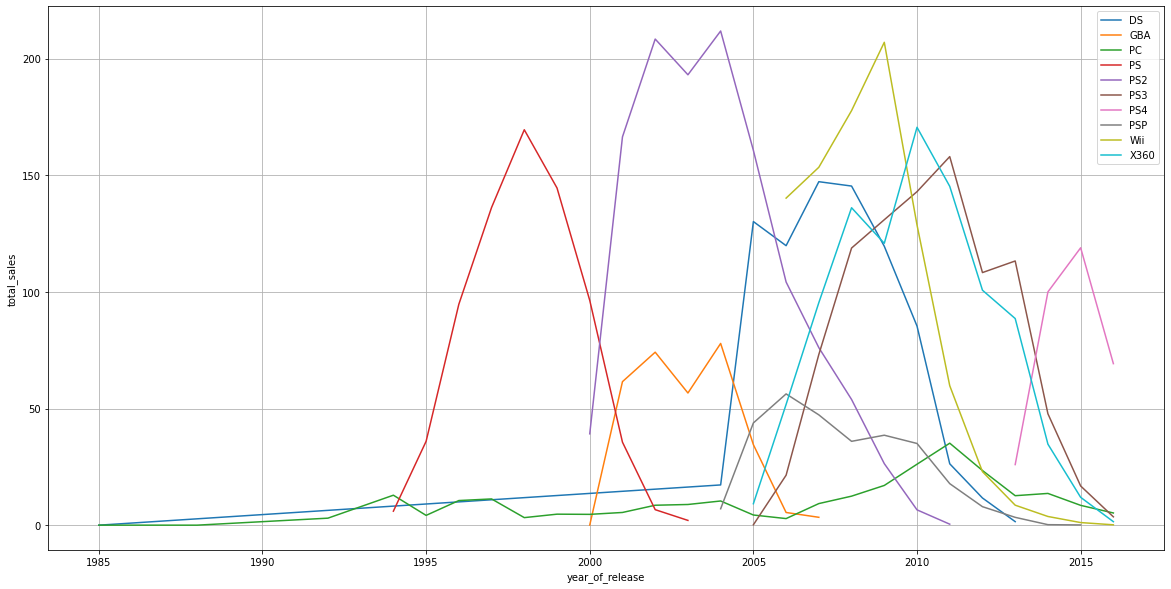

In [29]:
games_grop_by_platform.query('platform in @top_10_platform.platform').sort_values(by='year_of_release', ascending=True).set_index('year_of_release').groupby('platform').total_sales.plot(ylabel = 'total_sales', legend = 'platform', figsize=(20,10), grid=True)

Время жизни платформ преимущественно составляет 12 лет. Однако для дальнейшего анализа возьмем данные за период 2013-2016 гг (с учетом того, что с 2011 года происходит падение продаж и платформы растут в продажах 3-4 года). К 2016 году из ТОП 10 платформ (с наибольшими продажами за весь период наблюдения) остались PS4, PS3, PC, X360 (на них в 2016 году выходили и продавались релизы игр).

In [31]:
games_from_2013_to_2016 = games.query('year_of_release>=2013 and total_sales>0')
games_from_2013_to_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2237 non-null   object 
 1   platform         2237 non-null   object 
 2   year_of_release  2237 non-null   int64  
 3   genre            2237 non-null   object 
 4   na_sales         2237 non-null   float64
 5   eu_sales         2237 non-null   float64
 6   jp_sales         2237 non-null   float64
 7   other_sales      2237 non-null   float64
 8   critic_score     1329 non-null   float64
 9   user_score       1372 non-null   float64
 10  rating           2237 non-null   object 
 11  total_sales      2237 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 227.2+ KB


In [32]:
games_from_2013_to_2016_gb_platform = games_from_2013_to_2016.groupby(by=['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_from_2013_to_2016_gb_platform

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.66
6,PC,2014,13.63
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


In [33]:
games_from_2013_to_2016_gb_platform1=games_from_2013_to_2016.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)
games_from_2013_to_2016_gb_platform1

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,40.06
6,PSV,32.99
7,Wii,13.66
5,PSP,3.74


platform
3DS     AxesSubplot(0.125,0.125;0.775x0.755)
DS      AxesSubplot(0.125,0.125;0.775x0.755)
PC      AxesSubplot(0.125,0.125;0.775x0.755)
PS3     AxesSubplot(0.125,0.125;0.775x0.755)
PS4     AxesSubplot(0.125,0.125;0.775x0.755)
PSP     AxesSubplot(0.125,0.125;0.775x0.755)
PSV     AxesSubplot(0.125,0.125;0.775x0.755)
Wii     AxesSubplot(0.125,0.125;0.775x0.755)
WiiU    AxesSubplot(0.125,0.125;0.775x0.755)
X360    AxesSubplot(0.125,0.125;0.775x0.755)
XOne    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sales, dtype: object

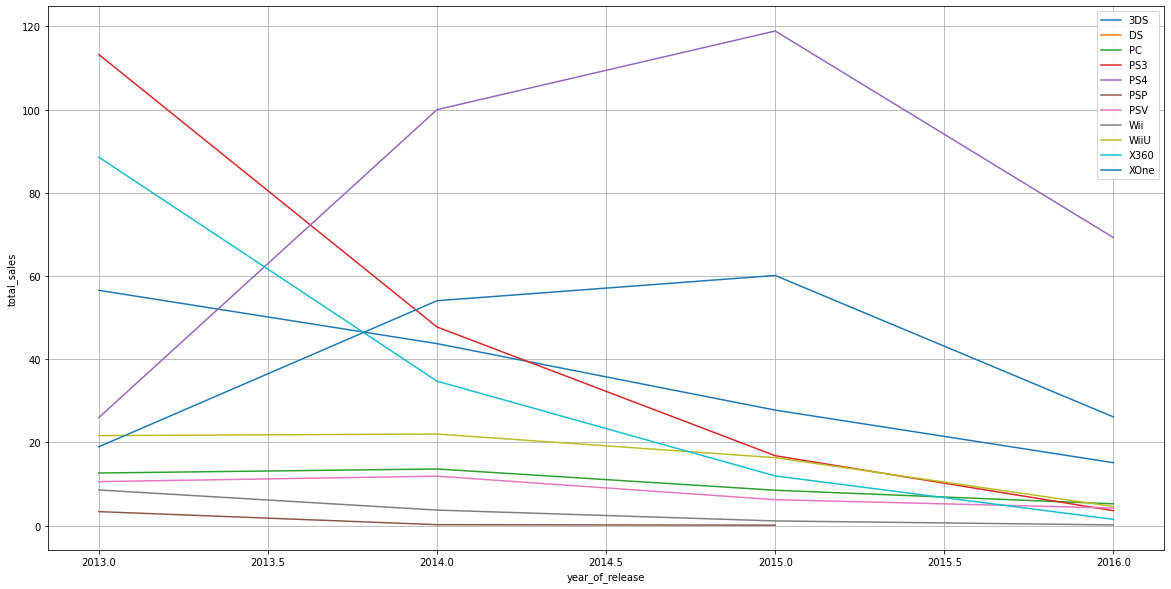

In [34]:
games_from_2013_to_2016_gb_platform.set_index('year_of_release').groupby('platform').total_sales.plot(ylabel = 'total_sales', legend = 'platform', figsize=(20,10), grid=True)

В 2013 - 2016 годах (с учетом того что в 2016 году данные предположительно неполные) предположительно набирали обороты платформы PS4 и XOne. Игры на платформе PSP перестали выходить и продаваться в 2015 году. Игры на платформе Wii имеют нулевые продажи в 2016 году. Остальные платформы к 2016 году имеют снижение продаж.  

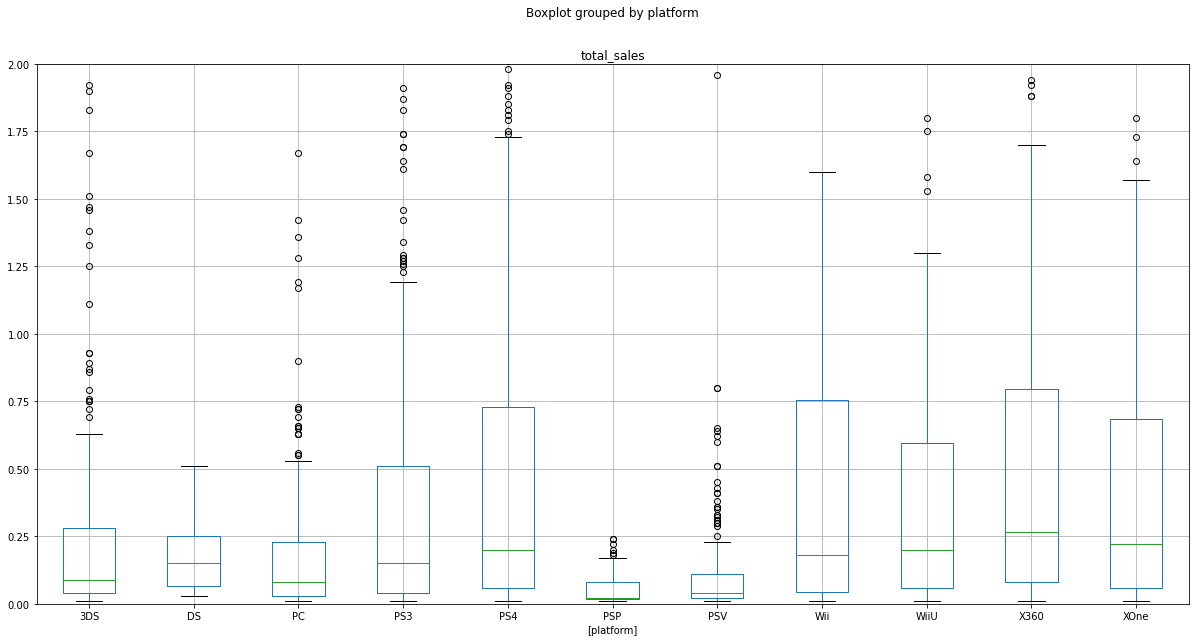

In [35]:
axes = games_from_2013_to_2016.boxplot(column=['total_sales'], by=['platform'], figsize=(20,10), return_type='axes', grid=True)

for ax in axes:
    ax.set_ylim(0,2)
    
plt.show()

In [36]:
games_from_2013_to_2016.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,1329.000000,1372.000000,2237.000000
mean,2014.475190,0.195704,0.175552,0.063040,0.053661,71.943787,6.602483,0.487957
std,1.089853,0.547291,0.512013,0.233829,0.165553,13.374518,1.607371,1.234181
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.737500,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


Данные по продажам в разрезе платформ распределены не равномерно, и характеризуется большим количеством выбросов (бестселлеров) и большим стандартным отклонением 1,5 млн. копий. Об этом говорят данные статистических показателей выборки медиана и значительно меньше среднего. Среднее находится выше 75 % всех результатов (3 квартиля). В основном продажи составляют от 0.06 млн. копий до 0,75 млн. копий.

In [37]:
x_360_data = games_from_2013_to_2016.query('platform=="X360"')

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

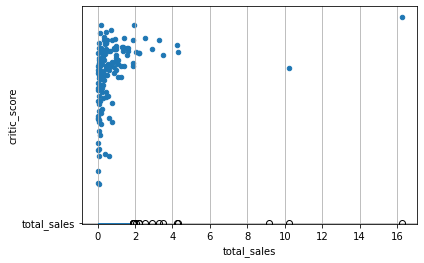

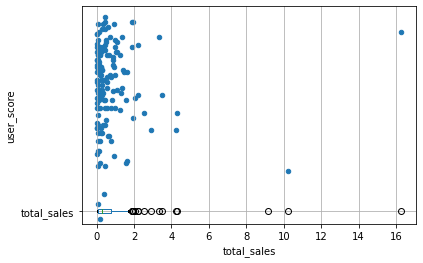

In [38]:
x_360_data.plot(kind='scatter', x='total_sales', y='critic_score', grid=True)
x_360_data.boxplot(column=['total_sales'], vert=False)
x_360_data.plot(kind='scatter', x='total_sales', y='user_score')
x_360_data.boxplot(column=['total_sales'], vert=False)

In [39]:
x_360_data['total_sales'].corr(x_360_data['critic_score'])

0.2961991906201606

In [40]:
x_360_data['total_sales'].corr(x_360_data['user_score'])

-0.007494619297380101

По диаграммам рассеяния и коэффициентам корреляции видно, что для платформы X360 между продажами и отзывами критиков существует средняя линейная связь. Линейная зависимость между продажами и отзывами пользователей отстутствует. Значения имеют большое рассеяние и  попадают во треугольный флаг, имеющий прикреплений к оси У длинная сторона которого следует наискосок от значения у=1,5 к значению у=9,5 вдоль оси х.

In [41]:
games_from_2013_to_2016['total_sales'].corr(games_from_2013_to_2016['critic_score'])

0.29806842287627555

In [42]:
games_from_2013_to_2016['total_sales'].corr(games_from_2013_to_2016['user_score'])

0.00996999018501519

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

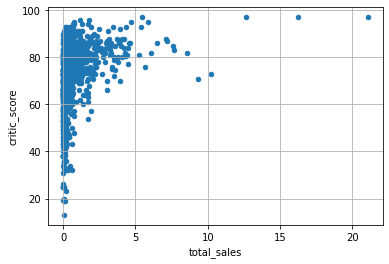

In [43]:
games_from_2013_to_2016.plot(kind='scatter', x='total_sales', y='critic_score', grid=True)

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

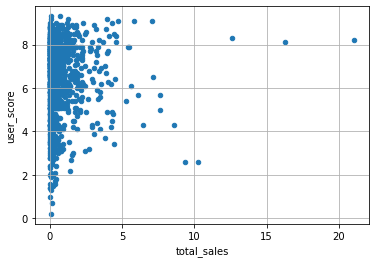

In [44]:
games_from_2013_to_2016.plot(kind='scatter', x='total_sales', y='user_score', grid=True)

Сделанные выше выводы справелдивы и для других платформ с учетом того, что зависимость продаж от оценки критиков слабее чем для платформы X360. Формы рассеяния схожи с формой рассеяния продаж и отзывов пользователей для платформы X360.

<AxesSubplot:title={'center':'Games by genre'}, xlabel='Median sales'>

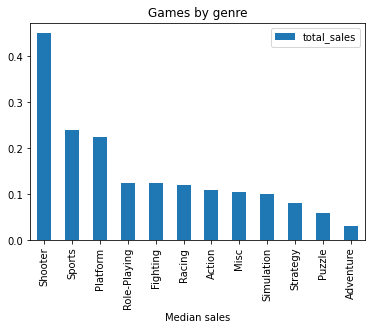

In [45]:
games_from_2013_to_2016_gb_genres = games_from_2013_to_2016.groupby('genre')['total_sales'].median().reset_index().sort_values('total_sales', ascending=False)
games_from_2013_to_2016_gb_genres
games_from_2013_to_2016_gb_genres.plot(kind='bar', x='genre', title="Games by genre", xlabel = "Median sales")

Наиболее продаваемыми (по медианному значению групп жанров) играми являются игры в жанре Shooter. Наименее продаваемыми игры в жанре Adventure.

In [46]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16567.000000,16567.000000,16567.000000,16567.000000,16567.000000,9035.000000,8639.000000,16567.000000
mean,2006.491881,0.263975,0.145814,0.078020,0.047567,68.783089,7.088010,0.535376
std,5.862239,0.816474,0.505364,0.310068,0.187476,14.093330,1.501612,1.554281
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.300000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.400000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [47]:
games_from_2013_to_2016.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,1329.000000,1372.000000,2237.000000
mean,2014.475190,0.195704,0.175552,0.063040,0.053661,71.943787,6.602483,0.487957
std,1.089853,0.547291,0.512013,0.233829,0.165553,13.374518,1.607371,1.234181
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.737500,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


статистические показатели (параметр total sales) исходной и отфильтрованной выборки имеют существенные различия (но они связаны с общим падением. Стат показатели пользовательских и оценок критиков существенно не изменились.

Вывод. Для более детального анализа были отобраны данные о продаже игр с 2013 по 2016 гг. Решение выбрать этот период для анализа обусловлено тем, что с продажи  с 2013 года снижаются но не резко, кроме того на рынке появляются новые перспективные платформы, которые могу потеряться в данных прошлых продаж. В основном (по данным 2013-2016) на действующих платформах продается от 0,06 до 0,75 млн копий, однако существует достаточное количество бестселлеров, продажи которых не укладываются в заданный диапазон. На платформах PS4 и XOne к 2015 году продажи росли. На остальных действующих в 2013-2016 годах платформах продажи снижались. На части платформ (PSP и Wii) в рассматриваемый период продажи прекратились. Между продажами о отзывами критиков существует средняя линейная взаимосвязь. Между продажами и отзывами пользователей линейная связь отсутствует. Самым пополурным жанром является Shooter, самыми непопулярными Adventure и Puzzle.

# 4. Составление портрета пользователя каждого региона

In [48]:
na_data_platform = games_from_2013_to_2016.pivot_table(index = 'platform', values ='na_sales',  aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_data_platform = games_from_2013_to_2016.pivot_table(index = 'platform', values ='eu_sales',  aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_data_platform = games_from_2013_to_2016.pivot_table(index = 'platform', values ='jp_sales',  aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [49]:
na_data_platform.head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [50]:
eu_data_platform.head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [51]:
jp_data_platform.head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Продажи на плаформах в Америке и Европе похожи. Есть различие в продажах в ранге некоторых платформ. В Японии есть уникальные платформы WiiU и PSV.

In [52]:
na_data_genre = games_from_2013_to_2016.pivot_table(index = 'genre', values ='na_sales',  aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_data_genre = games_from_2013_to_2016.pivot_table(index = 'genre', values ='eu_sales',  aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_data_genre = games_from_2013_to_2016.pivot_table(index = 'genre', values ='jp_sales',  aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [53]:
na_data_genre.head()

,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [54]:
eu_data_genre.head()

,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [55]:
jp_data_genre.head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


Предпочитаемые жанры в Америке и Европе совпадают. Отличие только в последних местах в Америке это Misc в Европе Rasing. В Японии популярный жанр (Shooter) игр находится на последнем месте. Уникальным для Японии является жанр Fighting. 

In [56]:
na_data_rating = games_from_2013_to_2016.pivot_table(index = 'rating', values ='na_sales',  aggfunc='sum').sort_values(by='na_sales', ascending=False)
eu_data_rating = games_from_2013_to_2016.pivot_table(index = 'rating', values ='eu_sales',  aggfunc='sum').sort_values(by='eu_sales', ascending=False)
jp_data_rating = games_from_2013_to_2016.pivot_table(index = 'rating', values ='jp_sales',  aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [57]:
na_data_rating

,na_sales
rating,
M,165.29
no rating,89.42
E,79.05
E10+,54.24
T,49.79


In [58]:
eu_data_rating

,eu_sales
rating,
M,145.80
E,83.36
no rating,78.91
E10+,42.69
T,41.95


In [59]:
jp_data_rating

,jp_sales
rating,
no rating,85.29
T,20.59
E,15.14
M,14.11
E10+,5.89


Продажи игр зависят от рейтинга точнее от его отсуствия (игры не имеющие возрастного рейтинга) занимают первые 3 места в продажах в зависимости от региона. Игры с рейтингом E10+ находятся в конце ТОП 5. Остальные рейтинги находятся на разных местах. Рейтинговые предпочтенния похожи в Америке и Европе.

Вывод:<br> 1. Продажи на в разрезе платформ в Америке и Европе пожожи. В Японии другое распределение продаж игр по платформам. Уникальные платформы для Японии WiiU и PSV <br> 2. Популярные жанры игр в Европе, Америке и Японии практические совпадают. Уникальным для Японии является жанр Fighting. <br> 3. Продажи игр без возрастного рейтинга наиболее популярны во всех 3 регионах. Игры с рейтингом E10+ одниково непопулярны в всех 3 регионах. В отношении игр с другими рейтингами зависимости нет.

# 5. Проверка гипотез

In [60]:
games_from_2013_to_2016_dropna = games_from_2013_to_2016.dropna(subset=['user_score'])

x_box_one_user_score = games_from_2013_to_2016_dropna[games_from_2013_to_2016_dropna['platform']=='XOne']['user_score']
pc_user_score = games_from_2013_to_2016_dropna[games_from_2013_to_2016_dropna['platform']=='PC']['user_score']
action_score = games_from_2013_to_2016_dropna[games_from_2013_to_2016_dropna['genre']=='Action']['user_score']
sports_score = games_from_2013_to_2016_dropna[games_from_2013_to_2016_dropna['genre']=='Sports']['user_score']

In [61]:
games_from_2013_to_2016_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 16 to 16544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1372 non-null   object 
 1   platform         1372 non-null   object 
 2   year_of_release  1372 non-null   int64  
 3   genre            1372 non-null   object 
 4   na_sales         1372 non-null   float64
 5   eu_sales         1372 non-null   float64
 6   jp_sales         1372 non-null   float64
 7   other_sales      1372 non-null   float64
 8   critic_score     1320 non-null   float64
 9   user_score       1372 non-null   float64
 10  rating           1372 non-null   object 
 11  total_sales      1372 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 139.3+ KB


Нулевая гиппотеза. Средние оценки пользователей на платформах XBoxOne и PC равны.
Альтернативная гиппотеза. Средние оценки пользователей на платформах XBoxOne и PC неравны.

In [62]:
alpha = 0.05
result = st.ttest_ind(x_box_one_user_score, pc_user_score)
print(result.pvalue)

if (result.pvalue)<alpha:
    print('Отвергаем нулевую гиппотезу')
else:
    print('Принимаем нулевую гиппотезу')

0.037433229555221846
Отвергаем нулевую гиппотезу


Гипотеза о равенстве средних оценок пользователей платформ XBoxOne и PC не нашла подтверждение на данном уровне значимости

______________________________________________________________________________________________

Нулевая гиппотеза. Средние оценки пользователей игр жанров Action и Sports равны.
Альтернативная гиппотеза. Средние оценки пользователей игр жанров Action и Sports неравны.

In [63]:
alpha = 0.05
result = st.ttest_ind(action_score, sports_score)
print(result.pvalue)

if (result.pvalue)<alpha:
    print('Отвергаем нулевую гиппотезу')
else:
    print('Принимаем нулевую гиппотезу')

2.094211289933641e-34
Отвергаем нулевую гиппотезу


Гипотеза о равенстве пользовательских оценок игр в жанрах Action и Sports не нашла подтверждения.

# Вывод про проекту:

1.Продажи игр до 1990 года были незначительными и оставались на одном уровне. После 1990 года начался постепенны рост продаж игр. В 2001 году стабильный рост сменился бурным ростом, продолжавшимся до 2008 года. После 2009 года начался спад продаж игр. <br> 2. Игровые платформы имеют определенный срок жизни около 12 лет.<br> 3. Продажи игр на основных платформах сосредоточены в интервале 0,06 - 0,75 млн. копий, после данных значений следует большое количество выбросов возможно обусловленные наличием досточного количества бестселлеров.<br> 4. За последние 3 года с 2013 по 2016 наблюдался рост продаж на платформах PS4 и XOne. Остальные платформы падали в продажах или продажи на них прекращались (Wii и PSP) <br>  5. Продажи игр средне зависят от оценок критиков и не зависят от оценок пользователей.<br> 6. Наиболее популярным жанром игр является Shooter. Наименее востребованные Adventure и Puzzle.<br> 7. Продажи по игровым платформам пожожи для Америки и Европы (самая популярная платформа PS4). В Японии другое распределени продаж по платформам. Популярные жанры игр в Европе, Америке и Японии практические совпадают. Уникальным для Японии является жанр Fighting. Продажи игр без возрастного рейтинга наиболее популярны во всех 3 регионах.<br> 8. Средние оценки пользователей платформ XBOne и PC предположительно не равны. Средние оценки игр жанров Action и Sport предположительно не равны.